In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# imports

import sys
import os
par_dir = os.path.split(os.getcwd())[0]
if par_dir not in sys.path:
    sys.path.append(par_dir)
# sys.path.append(r'/Users/artemgolovizin/GitHub')
from scipy.optimize import curve_fit
import inspect
import pickle
import imp
import re
import json

from IPython.html import widgets
from IPython.display import display
from IPython.html.widgets import interact, interactive, fixed

import thulium_python_lib.usefull_functions as usfuncs
import thulium_python_lib.image_processing_new as impr

import ipyparallel as ipp
ipp.CompositeError.tb_limit = 1

rc1 = ipp.Client()
lview = rc1.load_balanced_view()
dview = rc1.direct_view()
dview['par_dir'] = par_dir
# with dview.sync_imports():
#     import sys, os    
%px import sys, os
%px if par_dir not in sys.path: sys.path.append(par_dir)
%px import thulium_python_lib.image_processing_new as impr
%px import imp
%px from ipyparallel import bind_kernel; bind_kernel()

Done importing, module image_processing now


/Users/artemgolovizin/anaconda/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
# to reload library on remote and local engine
# %px imp.reload(impr)
# imp.reload(impr)
# imp.reload(usfuncs)

In [4]:
os.chdir(r'/Users/artemgolovizin/Downloads/2015_12_01')

In [5]:
old_ks = dict()

In [6]:
with open('all_data.txt', 'rb') as handle:
    data = pickle.loads(handle.read())

In [7]:
data.keys()

dict_keys(['01 t', '02 t'])

In [11]:
data['01 t']

{'data': {0.0: {1.0: {'center_pos': array([ 1059.25,  2118.5 ]),
    'fit1D_x': array([  1.27243992e+06,   2.13559714e+03,   1.61794122e+02,
             7.34172523e+02]),
    'fit1D_x_mean': array([  1.27249369e+06,   2.13565099e+03,   1.61812554e+02,
             7.34025523e+02]),
    'fit1D_x_std': array([  4.03074631e+04,   2.82288063e+00,   2.56318608e+00,
             1.13138515e+02]),
    'fit1D_y': array([  1.18999688e+06,   1.04771680e+03,   1.59842989e+02,
             1.19754061e+03]),
    'fit1D_y_mean': array([  1.19493180e+06,   1.04731859e+03,   1.60796040e+02,
             1.18064093e+03]),
    'fit1D_y_std': array([  6.14530304e+04,   6.13000830e+00,   1.81647152e+01,
             1.22716103e+02]),
    'fit2D': array([  1.13341427e+06,   1.04718409e+03,   2.13081957e+03,
             1.52790763e+02,   1.54854328e+02,   3.82229852e+00]),
    'image_url': array('folder=0.000000,shot_typeN=1', 
          dtype='<U28'),
    'isgood': array(True, dtype=bool),
    'total': 1

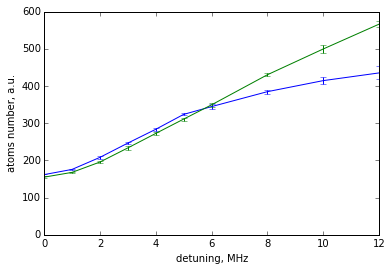

In [14]:
with open('all_data.txt', 'rb') as handle:
    data = pickle.loads(handle.read())
shot_typeN = 1
ks = list(data.keys())
ks.sort()
ch_boxes = dict()
ks_n = []
for k in ks:
    # optional - uncomment line below to sift only keys with specific marker, as 'CL'
#    if 'CL' not in k.upper(): continue
    ch_boxes[k]=old_ks.get(k,True)
    ks_n.append(k)
ks = ks_n
fg = None   
def plot_gr(l_pos,**ar):
    fig,ax = subplots() 
    global fg, old_ks
    old_ks = dict()
    for k in ks:
        old_ks[k]=ar[k]
        if ar[k]:
            d1 = impr.get_avr_data(data[k]['data'], shot_typeN, 'fit1D_x',2)
            errorbar(**d1)
#             d1['fmt']='ro'
#             d1['label']='fit1D_x'
#             val=datat[k]
#             x,y=impr.data2_sort(val[0],val[1])
#             # here it's time to modify data
# #             x = mod_from_AOM_to_real_freq(x, k, 420)
#             #x,y = x[1:],y[1:]
#             ax.plot(x,y,'-*',label=k)
    legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
    #xscale('log')
    #xlabel('Current, A')
    #xlabel('AOM frequency, MHz')
    xlabel('detuning, MHz') #in real frequencyes
    ylabel('atoms number, a.u.')
    ylim(bottom=0)
    #start, end = ax.get_xlim()
    #print(ax.get_xlim())
    #ax.xaxis.set_ticks(arange(start, end, 0.1))
    #axvline(x=l_pos)
    fg = fig
    
ter = interactive(plot_gr,l_pos=(150,250,0.1),**ch_boxes)
ter.box_style='info'
display(ter)

In [29]:
help(interactive)

Help on function interactive in module matplotlib:

interactive(b)
    Set interactive mode to boolean b.
    
    If b is True, then draw after every plotting command, e.g., after xlabel



###For managing clock line shift and broadening

#### Построение списка сканирования

In [ ]:
res = array(range(-7,7, 1))/10 + 420.1
rr = ''
for x in res:
    rr += str(x) + ' '
print(rr)